<a href="https://colab.research.google.com/github/Daniyal6124/DS_Tasks_2/blob/Task3/DDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import shap
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [4]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


EDA


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing Value Check:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
Diabetes

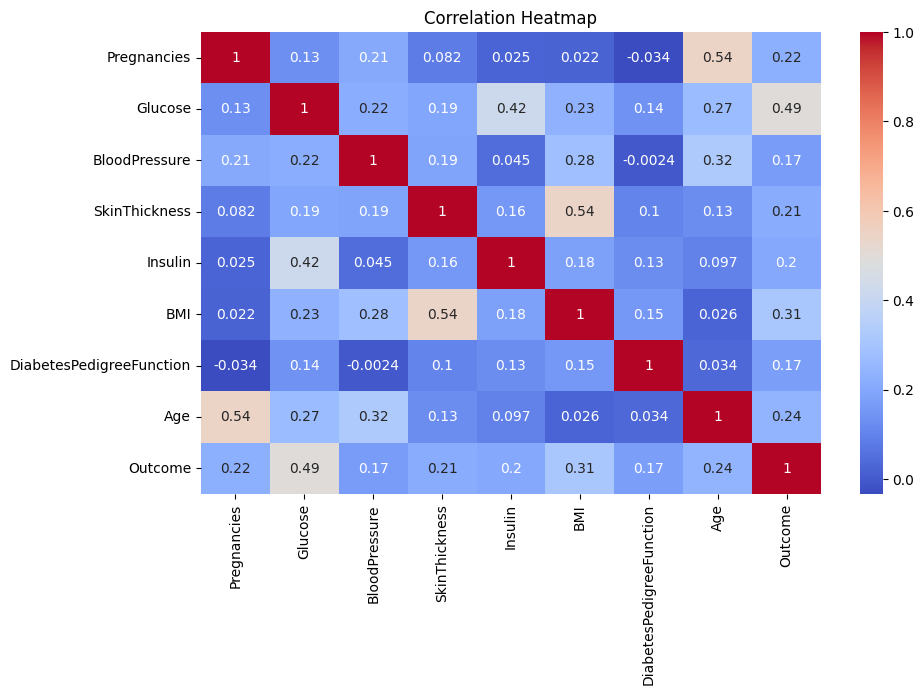

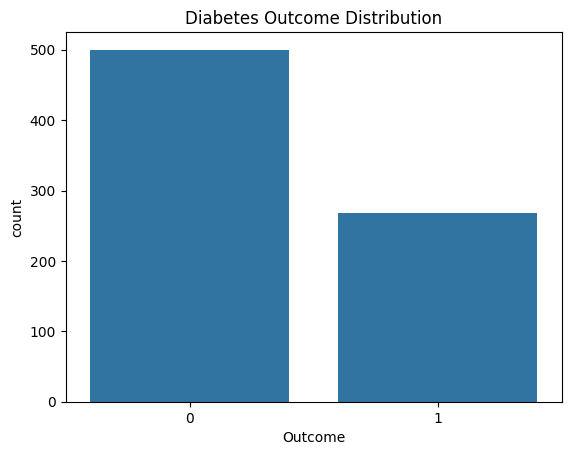

In [5]:
print("\nBasic Info:")
print(df.info())

print("\nMissing Value Check:")
print((df == 0).sum())

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

df.fillna(df.median(), inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.countplot(data=df, x='Outcome')
plt.title("Diabetes Outcome Distribution")
plt.show()

Feature Scaling

In [6]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Model Training

In [8]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

nn_model = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500)

Model Evaluation


Model: Gradient Boosting
F1 Score: 0.6263
AUC Score: 0.8306
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154


Model: SVM
F1 Score: 0.5859
AUC Score: 0.7965
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154


Model: Neural Network
F1 Score: 0.5941
AUC Score: 0.8048
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       100
           1       0.64      0.56      0.59        54

    accuracy    

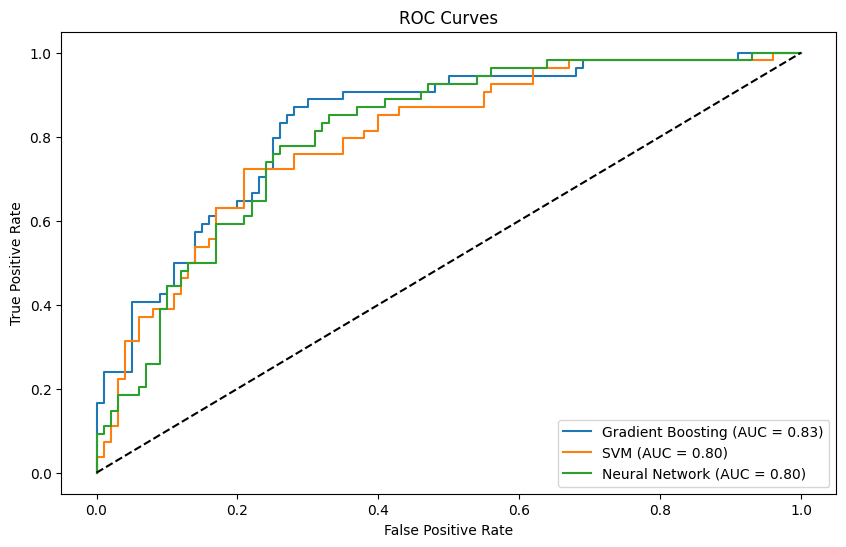

In [9]:
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    print(f"\nModel: {name}")
    print("F1 Score:", round(f1, 4))
    print("AUC Score:", round(auc, 4))
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.figure(figsize=(10, 6))
evaluate_model("Gradient Boosting", gb_model)
evaluate_model("SVM", svm_model)
evaluate_model("Neural Network", nn_model)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

Model Interpretability with SHAP (for Gradient Boosting)

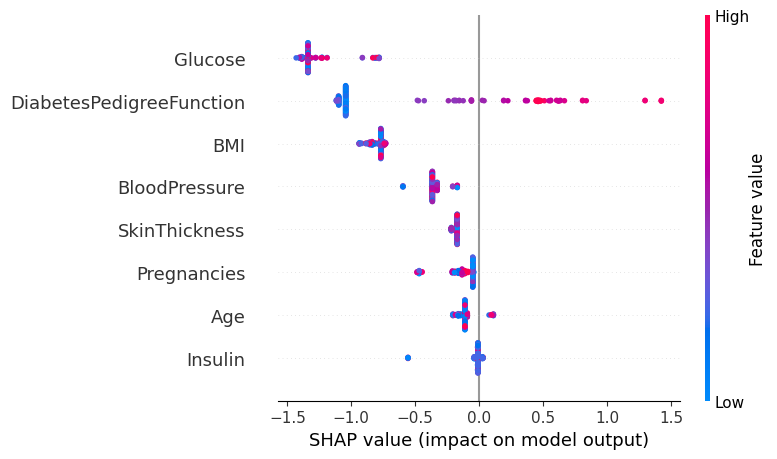

In [11]:
explainer = shap.Explainer(gb_model, X_train)
X_test_scaled = scaler.transform(X_test)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

Predictions:
*   The models we built predict the likelihood of a patient developing diabetes based on their health indicators like glucose levels, BMI, blood pressure, etc.
*   Our models, particularly Gradient Boosting, SVM, and Neural Networks, provide a probability score, which represents the confidence of the model in its prediction. This probability is crucial for healthcare professionals as it allows them to assess the risk level for each patient.
*   We can use techniques like SHAP values (already implemented for Gradient Boosting in your notebook) to understand which factors are most influential in the model's predictions.

Actionable Insights:
*   Based on the probability score, healthcare professionals can categorize patients into different risk groups (e.g., low, medium, high risk). This helps prioritize care and interventions.
*   By analyzing the important features for each individual prediction, healthcare professionals can provide tailored recommendations. For instance, if the model highlights 'Glucose' as a key factor for a particular patient, the recommendation might focus on blood sugar management.

*   Identifying high-risk individuals early on enables proactive interventions, potentially delaying or preventing the onset of diabetes.

*   Tools like SHAP summary plots can be used to visually explain the model's predictions to healthcare professionals. These plots highlight the impact of each feature on the prediction for individual patients.
*   Generate concise reports summarizing patient-specific predictions, risk levels, and key contributing factors. This facilitates clear communication and shared decision-making.











